# **Importing Libraries and Downloading Necessary Items**


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv
/kaggle/input/glove6b50dtxt/glove.6B.50d.txt


In [2]:
!pip3 install contractions


     |████████████████████████████████| 321 kB 819 kB/s eta 0:00:01
     |████████████████████████████████| 260 kB 3.4 MB/s eta 0:00:01
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp37-cp37m-linux_x86_64.whl size=102853 sha256=4e57c1e7eeedd595fdc3972fe0719c2ba8126c146c3db8c28ef49e9a16f13854
  Stored in directory: /root/.cache/pip/wheels/fe/ea/e6/38b0d734be6936b783e916a0d8d670313fb1b2f74c5889d4fe
Successfully built pyahocorasick


In [3]:
print(os.listdir('../input'))

['imdb-dataset-of-50k-movie-reviews', 'glove6b50dtxt']


In [4]:
import re
import nltk
import contractions
#nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
def check_null(data):
    for i in data.columns:
        print(i,":",data[str(i)].isna().sum())

We have imported all the necessary files. Let's Load the Data.

In [6]:
data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# **Checks**

Before going on with any Machine Learning or Deep Learning Tasks , there are always certain checks which should be made when it comes to the dataset.
These include :

1) Checking the shape of the data

2) Checking the type of data in each column (more than often Date type data is given the object tag as a data type)

3) Checking presence of Null values



In [7]:
data.shape

(50000, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
check_null(data)

review : 0
sentiment : 0


# **Text Cleaning**

Every Dataset has to go through cleaning. Let's check what kind of cleaning we will be performing in our case. 

In [10]:
data['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

As you can see , there are couple of HTML tags in the dataset. We will be getting rid of them , white spaces, some special characters, etc. I often find it hard to keep a count of things which need to be removed from the text , so shall we make a list ?

**To Do Cleaning List**

1) Remove HTML TAGS

2) Remove emojis

3) Remove numbers

4) Remove Punctuation

5) Remove Stopwords

6) Removing words whose length is less than 2

7) Fixing Contractions

8) Stemming or Lemmatizing the words (Upto you which one should be performed)

In [11]:
def clean_txt(txt):
        ##html code
        TAG_RE = re.compile(r'<[^>]+>') 
        txt = TAG_RE.sub('', txt.lower())
        ##emojis
        txt=txt.encode("ascii","ignore")
        txt=txt.decode()
        ##numbers removing
        txt=''.join(i for i in txt if not i.isdigit())
        ##punctuation
        txt = re.sub(r'[^\w\s]', ' ', txt) 
        ##stopwords
        txt = ' '.join([i for i in txt.split() if not i in STOPWORDS])
        ##removing certain sized words
        txt=' '.join([i for i in txt.split() if len(i)>2])
        ##contractions
        txt=contractions.fix(txt)
        ##stemmers
        ##txt= stemmer.stem(txt)  should stemming be performed or lemmatization and why?
        ##lemmatizer
        txt=lemmatizer.lemmatize(txt)
        return txt
clean_txt(data['review'][0])
        

'one reviewers mentioned watching episode hooked right exactly happened first thing struck brutality unflinching scenes violence set right word trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance mess around first episode ever saw struck nasty surreal say ready watched developed taste got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience w

In [12]:
data['Clean Text']=data['review'].apply(clean_txt)
data.head()

,review,sentiment,Clean Text
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching episode hooke...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


# **Label Encoding**

The sentiment need to be changed to numbers so that the machine can interpret them correctly.

In [13]:
sentiment = {'positive':0,'negative':1}
data['sentiment'] =  data['sentiment'].map(sentiment)
data.head()

,review,sentiment,Clean Text
0,One of the other reviewers has mentioned that ...,0,one reviewers mentioned watching episode hooke...
1,A wonderful little production. <br /><br />The...,0,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,0,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,1,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,petter mattei love time money visually stunnin...


# **Splitting the Data**

In [14]:
X = data['Clean Text']
Y = data['sentiment']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [16]:
print(len(max(data['Clean Text'],key=len)))
print(len(min(data['Clean Text'],key=len)))

9078
17


# **Converting sentences into tokens**

In [17]:
vocab_size = 10000
embedding_dim = 16
max_length = 21
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(x_train)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

# **The DL Model**


This is where the embedding layer will come into play. Our padded sequences will be feeded into the network and the network will assign each word in the padded sequence a vector. 

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 21, 16)            160000    
_________________________________________________________________
flatten (Flatten)            (None, 336)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               43136     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 211,457
Trainable params: 211,457
Non-trainable params: 0
_________________________________________________________________


# Training Time !!

In [19]:
num_epochs = 15
history = model.fit(padded, y_train , epochs=num_epochs, validation_data=(testing_padded, y_test))

Epoch 1/15
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5776 - accuracy: 0.6709 - val_loss: 0.4734 - val_accuracy: 0.7705
Epoch 2/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3399 - accuracy: 0.8527 - val_loss: 0.5211 - val_accuracy: 0.7514
Epoch 3/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1408 - accuracy: 0.9503 - val_loss: 0.8186 - val_accuracy: 0.7228
Epoch 4/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0364 - accuracy: 0.9888 - val_loss: 1.3097 - val_accuracy: 0.7131
Epoch 5/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 1.9006 - val_accuracy: 0.7117
Epoch 6/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 2.2731 - val_accuracy: 0.7085
Epoch 7/15
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0120 - accuracy: 0.9957 - val_loss: 2.2073 - val_accuracy:

Let's check how our model performed, shall we?

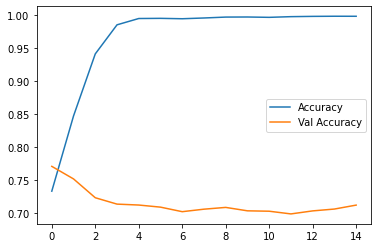

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy','Val Accuracy'])
plt.show()

Hmm, it seems like there is some issue with the training if you look at those graphs . Can you identify what it is and how to fix it ?

If yes, give it a go!

# **Word2Vec Embeddings**

In [21]:
sentences = [ ]
for _,row in data.iterrows():
    sentences+=row['Clean Text'].split()
[sentences[:2]]

[['one', 'reviewers']]

In [22]:
num_features = 300  # Word vector dimensionality
min_word_count = 1 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model....")
model = word2vec.Word2Vec([sentences],
                          workers=num_workers,
                          size=num_features,
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)

print('Completed')
# # To make the model memory efficient
model.init_sims(replace=True)

# # Saving the model for later use. Can be loaded using Word2Vec.load()
# model_name = "300features_40minwords_10context"
# model.save(model_name)

Training model....
Completed


Okay , now our embedding is ready. Let's have a look at our embedding's vocabulary!

In [23]:
list(model.wv.vocab)

['one',
 'reviewers',
 'mentioned',
 'watching',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'brutality',
 'unflinching',
 'scenes',
 'violence',
 'set',
 'word',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'pulls',
 'punches',
 'regards',
 'drugs',
 'sex',
 'hardcore',
 'classic',
 'use',
 'called',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focuses',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cells',
 'glass',
 'fronts',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'home',
 'many',
 'aryans',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italians',
 'irish',
 'scuffles',
 'death',
 'stares',
 'dodgy',
 'dealings',
 'shady',
 'agreements',
 'never',
 'far',
 'away',
 'would',
 'say',
 'main',
 'appeal',
 'due',
 'fact',
 'goes',
 'shows',
 'dare',
 'forget',
 'pretty',
 'pictures',
 'painted',
 'mainstream',
 'audiences',
 'charm',
 'romance

Want to see what a embedding vector looks like ?  Run the next cell.

In [24]:
print (model['films'])

[ 1.10376105e-02  9.66386497e-03 -9.45737511e-02 -1.34236803e-02
 -2.32956354e-02 -2.31302530e-02 -5.51475473e-02 -5.25132865e-02
 -5.69269769e-02 -2.48157587e-02 -4.77669127e-02  1.90865491e-02
 -5.62077574e-02  9.97697338e-02  9.29802954e-02  4.26006131e-02
  7.94763491e-02  6.01115311e-03  9.77635570e-03 -7.57609904e-02
  6.25854507e-02  5.52436784e-02  7.10793510e-02 -4.14181873e-02
  7.17825368e-02 -1.25907073e-02  9.41790417e-02 -5.46452254e-02
  6.90845996e-02 -3.58196609e-02  1.03368424e-01  5.70517173e-03
  8.18006098e-02  4.61030677e-02 -5.17112873e-02  4.21668068e-02
  6.66463450e-02 -9.47121531e-02  7.82824904e-02  1.33314217e-02
  1.87510140e-02  2.78144516e-03  7.45311528e-02 -7.53162503e-02
 -5.48338108e-02 -2.41310932e-02  4.34862543e-03 -9.83603820e-02
  2.47549322e-02  8.89454335e-02  1.02449134e-02  6.72339648e-02
  9.08220485e-02  6.01482987e-02  6.73663020e-02 -9.66666490e-02
 -3.58259417e-02 -9.51125622e-02 -1.18113868e-02  2.45330315e-02
  3.26335244e-02  1.99475

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


Let's see whether this embedding knows it's neighbours. Run the next cell to find words in the vocabulary the embedding finds most relatable to the words we have given.

In [25]:
print(model.wv.most_similar("city"))


[('townful', 0.23481178283691406), ('refreshing', 0.23268479108810425), ('wilkins', 0.22754745185375214), ('extradition', 0.22659806907176971), ('propulsive', 0.2248670905828476), ('prayed', 0.22400279343128204), ('kwei', 0.22118082642555237), ('pendragon', 0.21854759752750397), ('prevading', 0.21828554570674896), ('caregiving', 0.21611487865447998)]


In [26]:
print(model.wv.most_similar("films"))

[('hooooot', 0.24837492406368256), ('deboo', 0.23211444914340973), ('dramatics', 0.22712494432926178), ('franic', 0.2265082597732544), ('robart', 0.22634871304035187), ('rossitto', 0.22254058718681335), ('yeller', 0.2196546196937561), ('protelco', 0.21926872432231903), ('exempting', 0.21918964385986328), ('easing', 0.21660758554935455)]


# **Making the Embedding Matrix / Layer**

The below two codes help make the embedding vector. Logic explained in PPT.

In [27]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words.split():
        if word in index2word_set:
            #print("Found Word")
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec



In [28]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs


In [29]:
trainVectors = getAvgFeatureVecs(x_train,model,num_features)
testVectors = getAvgFeatureVecs(x_test,model,num_features)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


Review 0 of 40000
Review 1000 of 40000
Review 2000 of 40000
Review 3000 of 40000
Review 4000 of 40000
Review 5000 of 40000
Review 6000 of 40000
Review 7000 of 40000
Review 8000 of 40000
Review 9000 of 40000
Review 10000 of 40000
Review 11000 of 40000
Review 12000 of 40000
Review 13000 of 40000
Review 14000 of 40000
Review 15000 of 40000
Review 16000 of 40000
Review 17000 of 40000
Review 18000 of 40000
Review 19000 of 40000
Review 20000 of 40000
Review 21000 of 40000
Review 22000 of 40000
Review 23000 of 40000
Review 24000 of 40000
Review 25000 of 40000
Review 26000 of 40000
Review 27000 of 40000
Review 28000 of 40000
Review 29000 of 40000
Review 30000 of 40000
Review 31000 of 40000
Review 32000 of 40000
Review 33000 of 40000
Review 34000 of 40000
Review 35000 of 40000
Review 36000 of 40000
Review 37000 of 40000
Review 38000 of 40000
Review 39000 of 40000
Review 0 of 10000
Review 1000 of 10000
Review 2000 of 10000
Review 3000 of 10000
Review 4000 of 10000
Review 5000 of 10000
Review 600

# **Finding the Perfect Fit**

Time to try our prepapred vectors with certain classification ML algorithms.

In [30]:
from sklearn import tree
from sklearn.metrics import classification_report
clf = tree.DecisionTreeClassifier()
clf = clf.fit(trainVectors,y_train)
res = clf.predict(testVectors)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      5039
           1       0.55      0.56      0.56      4961

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.56      0.56      0.56     10000



In [31]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
    
forest = forest.fit(trainVectors, y_train)
res = forest.predict(testVectors)
print(classification_report(y_test,res))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      5039
           1       0.70      0.63      0.66      4961

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(trainVectors, y_train).predict(testVectors)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.64      5039
           1       0.64      0.70      0.67      4961

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
y_pred = lr.fit(trainVectors, y_train).predict(testVectors)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74      5039
           1       0.74      0.70      0.72      4961

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



# **Glove Embedding**

You will have to download the GloveEmbedding vectors for this. [You can download it here.](https://nlp.stanford.edu/data/glove.6b.zip)

# Loading the Embedding

In [34]:
GLOVE_DIR='../input/glove6b50dtxt'
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.6B.50d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


# Making the Embedding Matrix

In [35]:
EMBEDDING_DIM = 50
embedding_matrix = np.zeros((len(word_index) + 1, 50))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [36]:
embedding_layer = tf.keras.layers.Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=False)

# DL Model 

The only difference between this and the DL model we trained in the beginning , is that here the weights of the embedding layer are provided by us. 
These weights are the ones which came from the Glove embedding.

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1,EMBEDDING_DIM,weights=[embedding_matrix],input_length=max_length,trainable=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 21, 50)            4634800   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1050)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               134528    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,777,649
Trainable params: 142,849
Non-trainable params: 4,634,800
_________________________________________________________________


# Training Time

In [38]:
num_epochs = 15
history = model.fit(padded, y_train , epochs=num_epochs, validation_data=(testing_padded, y_test))

Epoch 1/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6424 - accuracy: 0.6254 - val_loss: 0.6066 - val_accuracy: 0.6734
Epoch 2/15
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5831 - accuracy: 0.6910 - val_loss: 0.6139 - val_accuracy: 0.6599
Epoch 3/15
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5400 - accuracy: 0.7234 - val_loss: 0.6050 - val_accuracy: 0.6719
Epoch 4/15
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4552 - accuracy: 0.7820 - val_loss: 0.6567 - val_accuracy: 0.6511
Epoch 5/15
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3436 - accuracy: 0.8478 - val_loss: 0.7963 - val_accuracy: 0.6238
Epoch 6/15
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2403 - accuracy: 0.9018 - val_loss: 0.9422 - val_accuracy: 0.6254
Epoch 7/15
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1585 - accuracy: 0.9387 - val_loss: 1.0757 - val_accuracy:

# Perfomance Check 

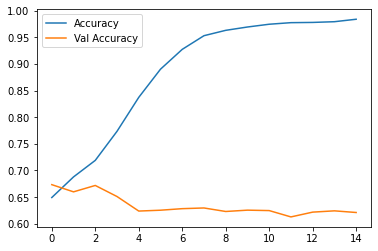

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy','Val Accuracy'])
plt.show()

Again some issue right ? Do you think it is because of the embedding or something else ? Try fixing it. 